In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


In [2]:
import os
import xarray as xr
from boutdata import collect

def load_simulation_data(base_dir, alpha_values, neon_values):
    data = {}
    for alpha in alpha_values:
        for neon in neon_values:
            # Construct the path to the specific simulation
            sim_path = os.path.join(base_dir, f'alpha_{alpha}', f'neon_{neon}')
            try:
                print('loading data for alpha={}, neon={}'.format(alpha, neon))
                # Load the latest timestep (t=-1) using BOUT's load.case_1D method
                ds = Load.case_1D(sim_path).ds.isel(t=-1)
                data[(alpha, neon)] = ds
            except Exception as e:
                print(f"Failed to load data for alpha={alpha}, neon={neon}: {e}")
    return data


# Now, `simulation_data` is a dictionary where keys are (alpha, neon) tuples and values are xarray datasets.

In [3]:

# Define your parameters
selective_dir = "/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-08-11_selective_collisions_old_collision_setup"
old_dir = "/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-03-25_wigram_reference_glover_comparison_FINAL"
# alpha_values = ['snb']
neon_values = ['0.0', '0.02', '0.04', '0.06', '0.08', '0.1']

# Load the data
selective_snb = load_simulation_data(selective_dir, ['snb'], neon_values)
selective_sh = load_simulation_data(selective_dir, ['-1'], neon_values)
selective_02 = load_simulation_data(selective_dir, ['0.2'], neon_values)
selective_006 = load_simulation_data(selective_dir, ['0.06'],neon_values)


old_02 = load_simulation_data(old_dir, ['0.2'], neon_values)
old_006 = load_simulation_data(old_dir, ['0.06'], neon_values)
old_snb = load_simulation_data(old_dir, ['snb'], neon_values)
old_sh = load_simulation_data(old_dir, ['-1'], neon_values)

loading data for alpha=snb, neon=0.0


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=snb, neon=0.02


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=snb, neon=0.04


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=snb, neon=0.06


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=snb, neon=0.08


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=snb, neon=0.1


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.0


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.02


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.04


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.06


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.08


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.1


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.0


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.02


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.04


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.06


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.08


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.1


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.0


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.02


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.04


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.06


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.08


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.1


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.0


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.02


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.04


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.06


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.08


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.2, neon=0.1


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.0


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.02


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.04


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.06


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.08


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.1


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=snb, neon=0.0


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=snb, neon=0.02


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=snb, neon=0.04


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=snb, neon=0.06


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=snb, neon=0.08


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=snb, neon=0.1


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.0


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.02


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.04


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.06


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.08


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=-1, neon=0.1


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


In [13]:
def save_last_time_slice(base_dir, alpha_values, neon_values):
    for alpha in alpha_values:
        for neon in neon_values:
            # Construct the path to the specific simulation
            sim_path = os.path.join(base_dir, f'alpha_{alpha}', f'neon_{neon}')
            try:
                print(f'Loading data for alpha={alpha}, neon={neon}')
                # Load the latest timestep (t=-1) using BOUT's load.case_1D method
                ds = Load.case_1D(sim_path).ds.isel(t=-1)
                
                # Create a daughter directory for the last time slice
                save_dir = os.path.join(base_dir, 'last_time_slice', f'alpha_{alpha}', f'neon_{neon}')
                os.makedirs(save_dir, exist_ok=True)
                
                # Save the last time slice as BOUT.dmp file in the daughter directory
                save_path = os.path.join(save_dir, 'BOUT.dmp.1.nc')
                ds.to_netcdf(save_path)
                
                print(f'Saved last time slice to {save_path}')
            except Exception as e:
                print(f"Failed to process data for alpha={alpha}, neon={neon}: {e}")


neon_values = ['0.0', '0.02', '0.04', '0.06', '0.08', '0.1']

save_last_time_slice(selective_dir, ['-1'], ['0.0'])




Loading data for alpha=-1, neon=0.0


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


Failed to process data for alpha=-1, neon=0.0: Invalid value for attr 'metadata': {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.51425755137, 'HERMES_REVISION': '46f69e6c6f9ed74dea121bb6d6114cbe674bbb9a', 'HERMES_SLOPE_LIMITER': 'MinMod', 'MXG': 0, 'MXSUB': 1, 'MYG': 2, 'MYSUB': 25, 'MZ': 1, 'MZG': 0, 'MZSUB': 1, 'NXPE': 1, 'NYPE': 32, 'NZPE': 1, 'Nnorm': 1e+19, 'Omega_ci': 95788333.03066081, 'Tnorm': 100.0, 'ZMAX': 1.0, 'ZMIN': 0.0, 'has_adios': 0, 'has_caliper': 0, 'has_cuda': 0, 'has_fftw': 1, 'has_gettext': 1, 'has_hypre': 0, 'has_lapack': 0, 'has_netcdf': 1, 'has_petsc': 1, 'has_pretty_function': 1, 'has_pvode': 1, 'has_raja': 0, 'has_scorep': 0, 'has_slepc': 0, 'has_sundials': 1, 'has_umpire': 0, 'hist_hi': 599, 'iteration': 599, 'ixseps1': -1, 'ixseps2': -1, 'jyseps1_1': -1, 'jyseps1_2': 400, 'jyseps2_1': 400, 'jyseps2_2': 799, 'nx': 1, 'ny': 800, 'ny_inner': 400, 'nz': 1, 'rho_s0': 0.0010217477552952484, 'run_id': '33cd2d58-40d4-45de-b7c2-043c4365bdac', 'run_restart_from': 'z

In [7]:
def replace_guards(var):
    """
    This in-place replaces the points in the guard cells with the points 
    on the boundary.
    """
    var = var[1:-1]  # Strip the edge guard cells

    var[0] = 0.5 * (var[0] + var[1])
    var[-1] = 0.5 * (var[-1] + var[-2])
    
    return var

def plot_temperature_profiles(simulation_data, guard_replace=True, inlcude_axis=True):
    if inlcude_axis:
        fig,ax = plt.subplots(1,1,figsize=(10,6),dpi=500)
    for (alpha, neon), ds in simulation_data.items():
        try:

            
            y = ds['pos'].values
            Te = ds['Te'].values
            if guard_replace:
                y = y[1:-1]
                Te = replace_guards(Te)


            ax.plot(y, Te, label=f'alpha={alpha}, neon={neon}')
        
        except KeyError:
            print(f"Te or y not found in dataset for alpha={alpha}, neon={neon}")
            continue

    ax.set_xlabel('y (Position)')
    ax.set_ylabel('Te (Temperature)')
    ax.set_title('Temperature Profiles for All Simulations')
    ax.legend(loc='best')
    # ax.set_xbound(65,72)
    ax.grid(True)




In [9]:
plot_temperature_profiles(selective_collisions)


NameError: name 'selective_collisions' is not defined

In [ ]:
import matplotlib.pyplot as plt


def plot_temperature_profiles(simulation_data, data_label=None, 
                              guard_replace=True, ax=None, linestyle='-', 
                              alpha_values=None, neon_values=None):
    """
    Plots temperature profiles for the given simulation data.

    Parameters:
    simulation_data (dict): Dictionary containing datasets to plot.
    data_label (str, optional): Name of the simulation data to be used in the 
                                label. Defaults to None.
    guard_replace (bool): Whether to replace guard cells in the data.
    ax (matplotlib.axes.Axes): Axis to plot on. If None, a new one is created.
    linestyle (str): Line style for the plot.
    alpha_values (list, optional): List of alpha values to plot. Defaults to None.
    neon_values (list, optional): List of neon values to plot. Defaults to None.

    Returns:
    ax (matplotlib.axes.Axes): The axis with the plotted data.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=500)

    for (alpha, neon), ds in simulation_data.items():
        if (alpha_values is not None and alpha not in alpha_values) or \
           (neon_values is not None and neon not in neon_values):
            continue  # Skip this dataset if it's not in the specified values

        try:
            y = ds['pos'].values
            Te = ds['Te'].values
            if guard_replace:
                y = y[1:-1]
                Te = replace_guards(Te)

            label = f'{data_label}: alpha={alpha}, neon={neon}' if data_label else f'alpha={alpha}, neon={neon}'
            ax.plot(y, Te, label=label, linestyle=linestyle)
        
        except KeyError:
            print(f"Te or y not found in dataset for alpha={alpha}, neon={neon}")
            continue

    ax.set_xlabel('y (Position)')
    ax.set_ylabel('Te (Temperature)')
    ax.set_title('Temperature Profiles for All Simulations')
    ax.legend(loc='best')
    ax.grid(True)

    return ax



<Axes: title={'center': 'Temperature Profiles for All Simulations'}, xlabel='y (Position)', ylabel='Te (Temperature)'>

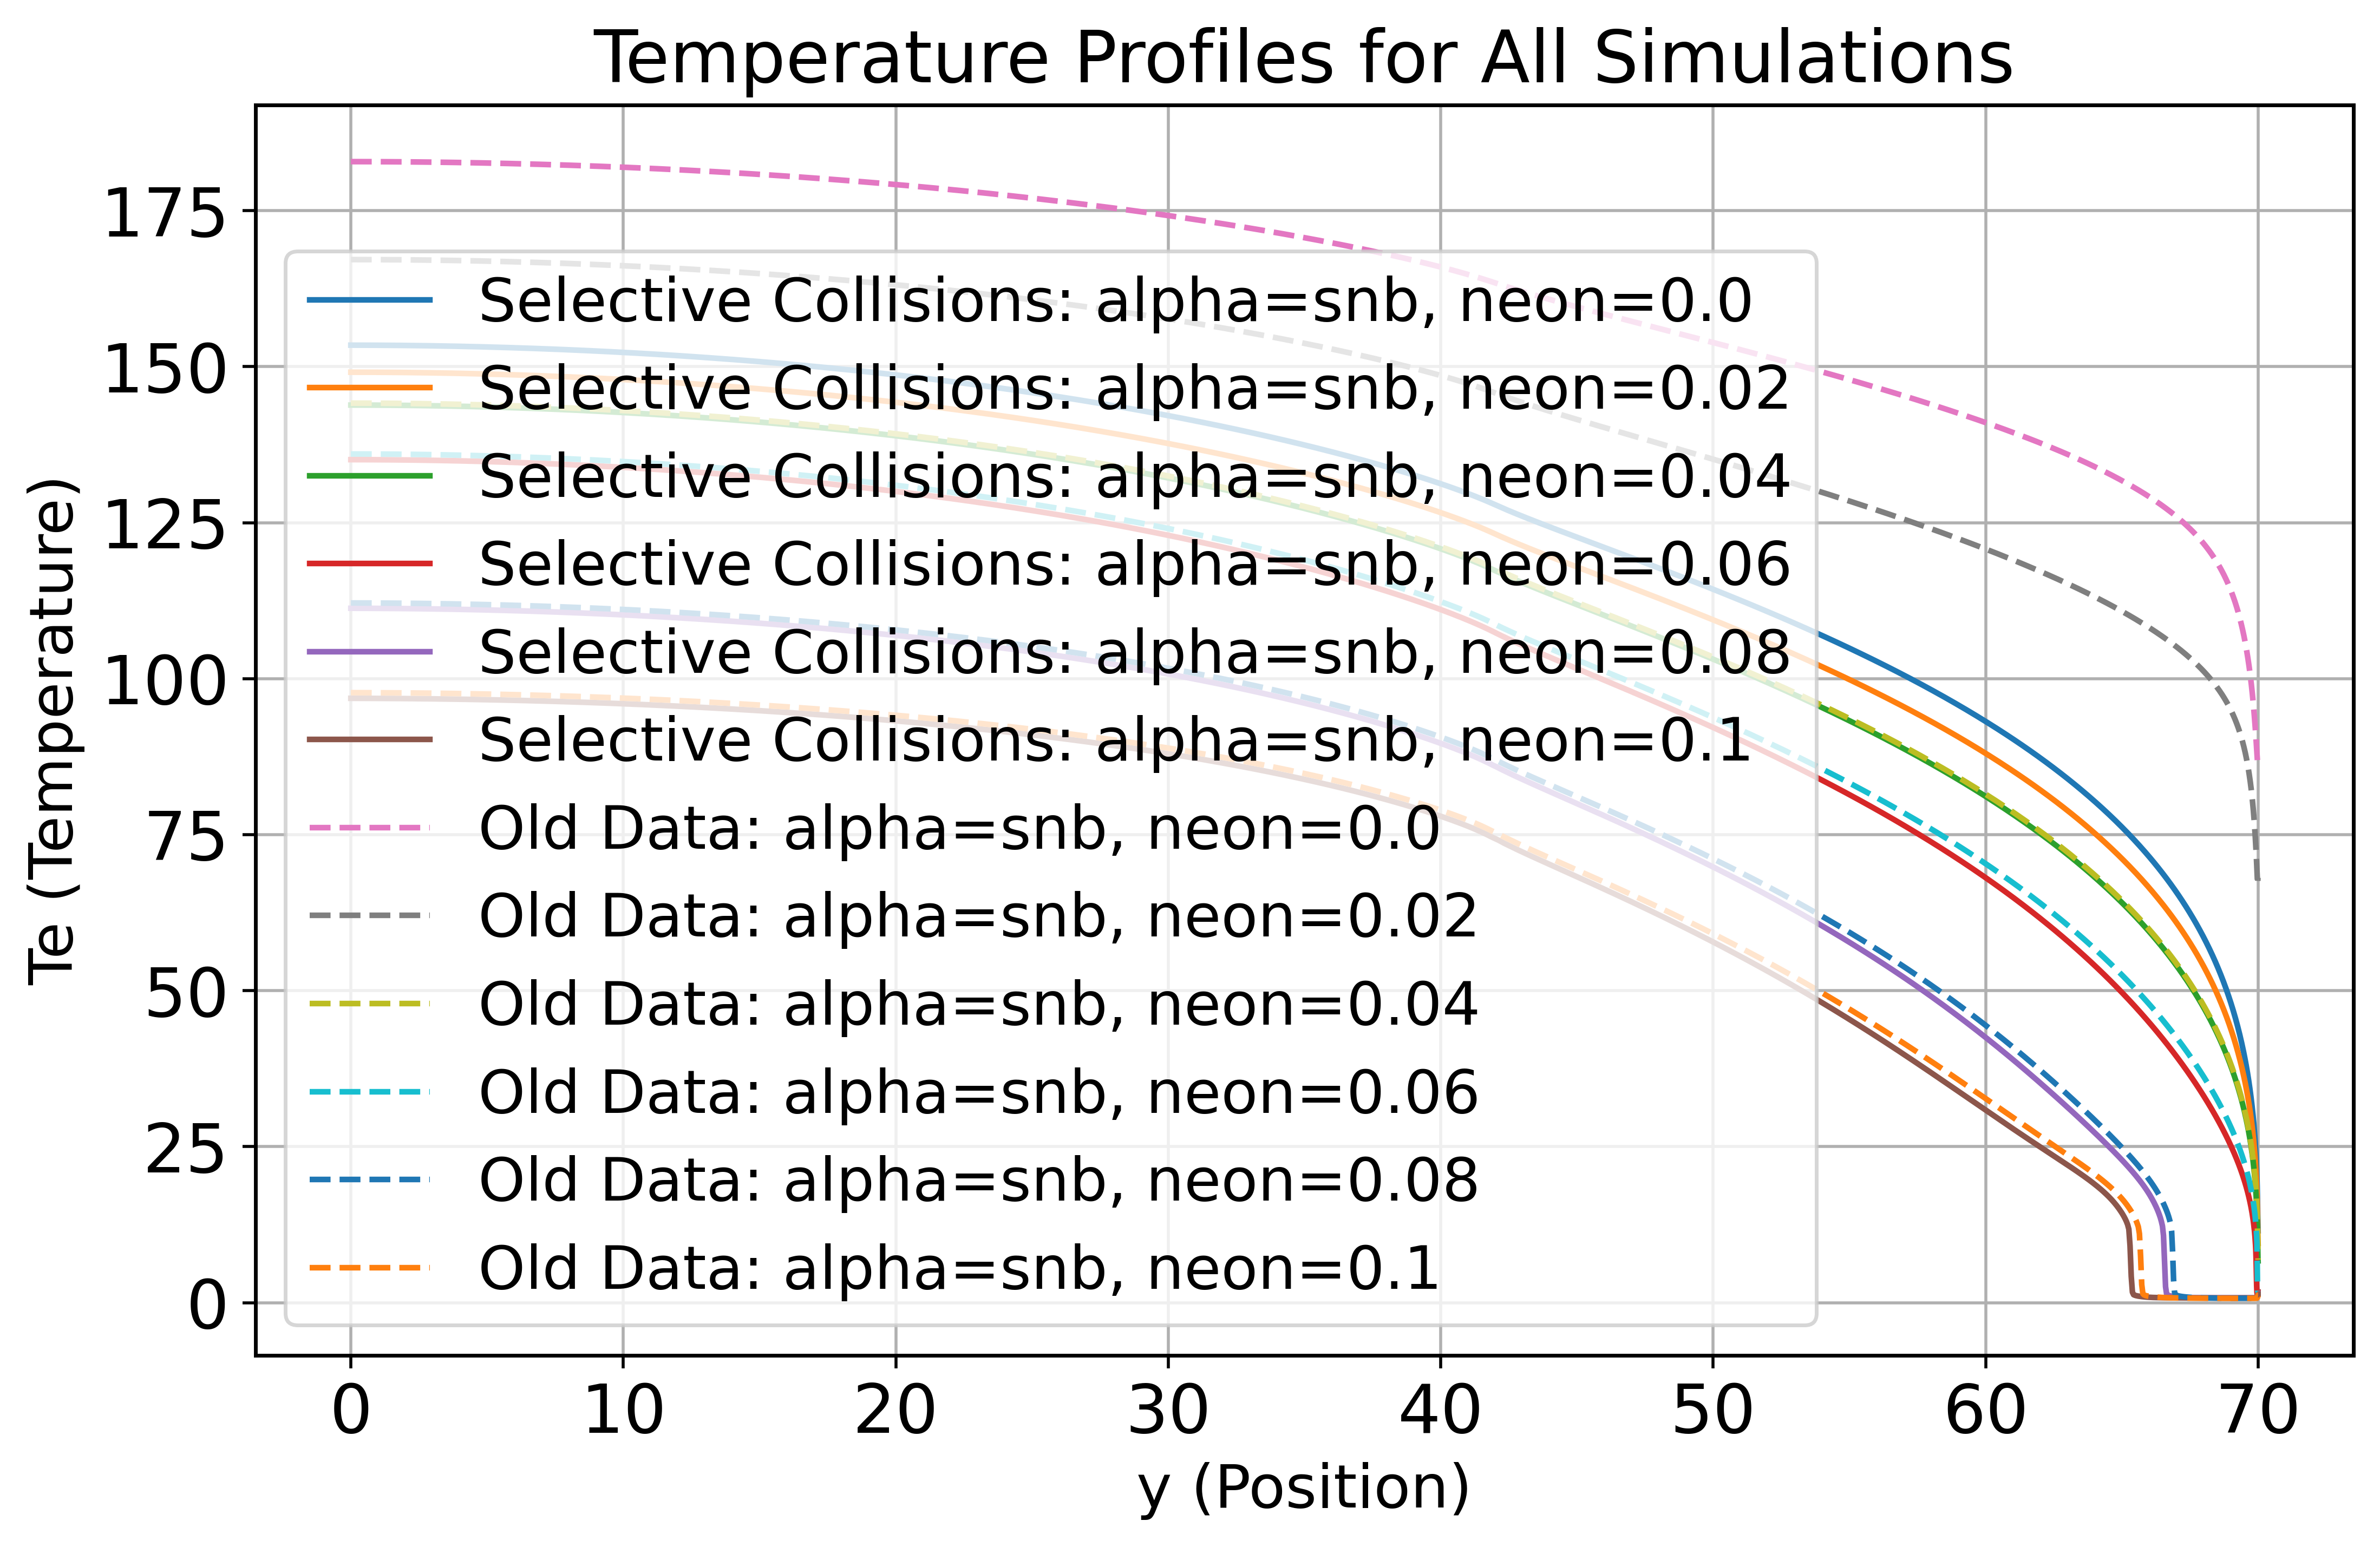

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=500)

plot_temperature_profiles(selective_snb, data_label='Selective Collisions', ax=ax)
plot_temperature_profiles(old_snb, data_label='Old Data', ax=ax, linestyle='--')


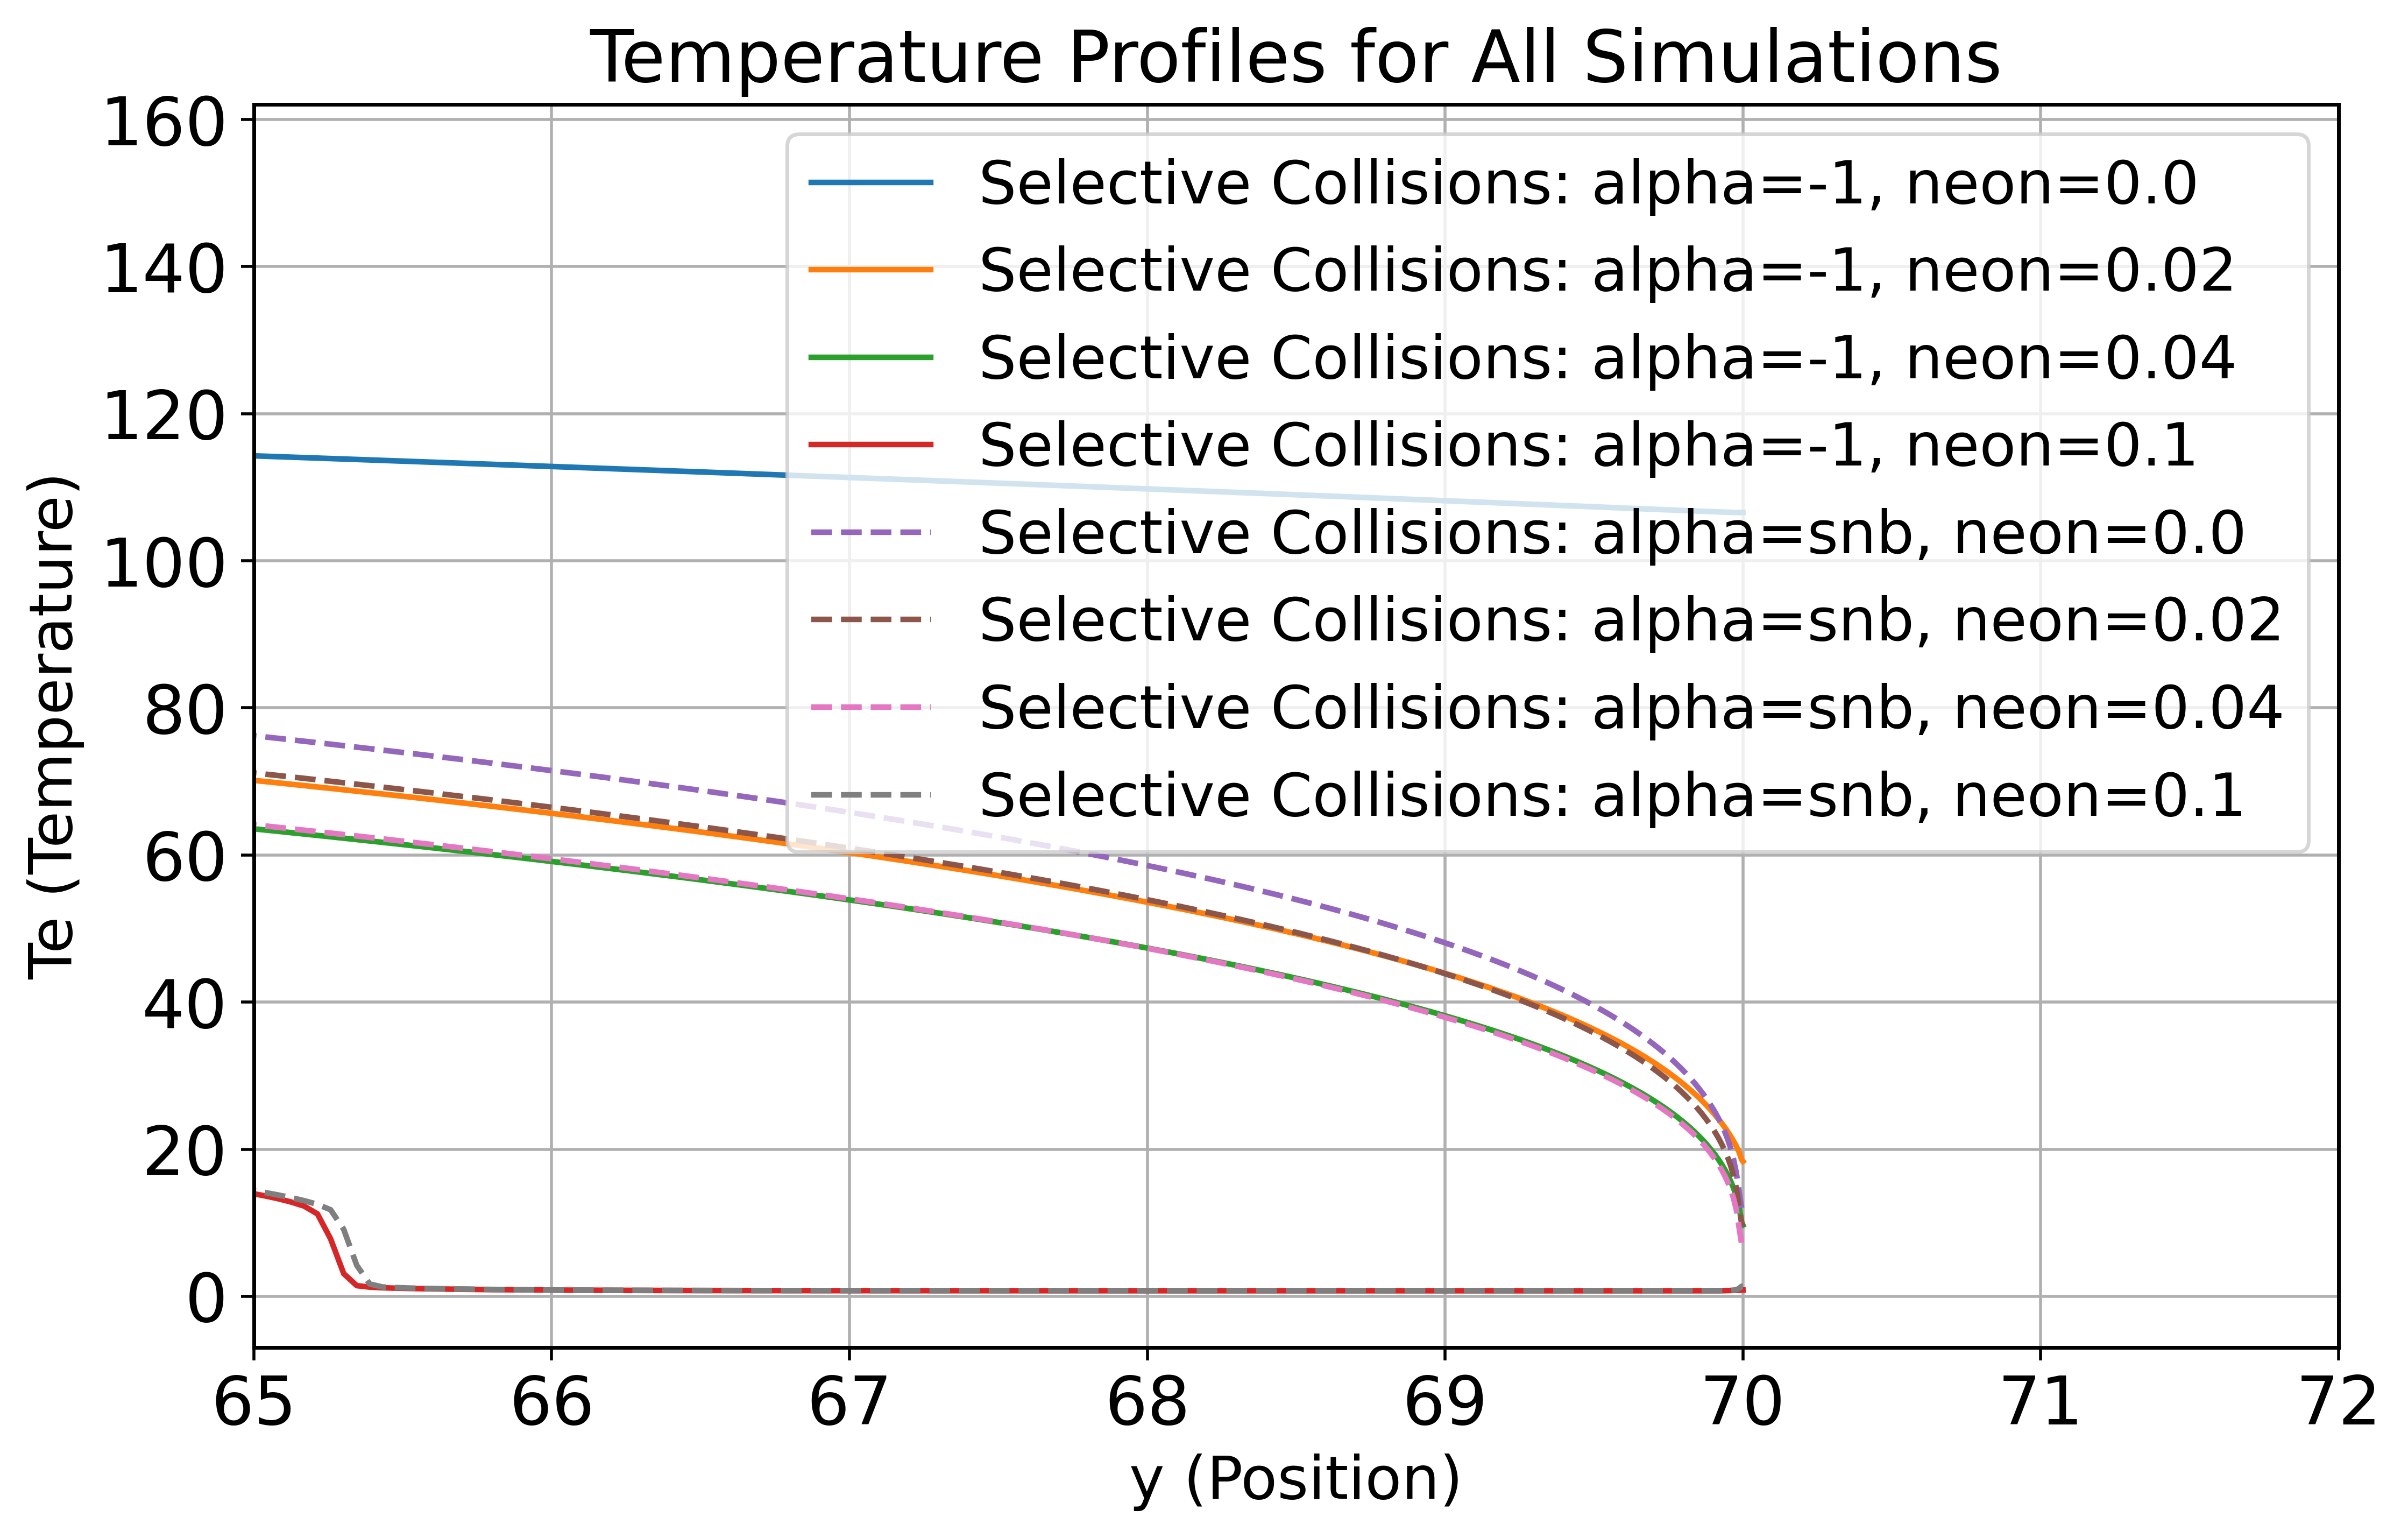

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=500)

neon_values = ['0.0', '0.02', '0.04', '0.1']

plot_temperature_profiles(selective_sh, data_label='Selective Collisions', ax=ax, neon_values=neon_values)
plot_temperature_profiles(selective_snb, data_label='Selective Collisions', ax=ax, linestyle='--', neon_values=neon_values)
# plot_temperature_profiles(old_sh, data_label='Old Data', ax=ax, linestyle='--')

ax.set_xbound(65, 72)

loading data for alpha=0.06, neon=0.0


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.02


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.0


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


loading data for alpha=0.06, neon=0.02


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


Unnormalising with xHermes


/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


In [5]:
import matplotlib.pyplot as plt

def replace_guards(var):
    """
    This in-place replaces the points in the guard cells with the points 
    on the boundary.
    """
    var = var[1:-1]  # Strip the edge guard cells

    var[0] = 0.5 * (var[0] + var[1])
    var[-1] = 0.5 * (var[-1] + var[-2])
    
    return var

def plot_temperature_profiles(simulation_data, data_label=None, 
                              guard_replace=True, ax=None, linestyle='-', 
                              alpha_values=None, neon_values=None):
    """
    Plots temperature profiles for the given simulation data.

    Parameters:
    simulation_data (dict): Dictionary containing datasets to plot.
    data_label (str, optional): Name of the simulation data to be used in the 
                                label. Defaults to None.
    guard_replace (bool): Whether to replace guard cells in the data.
    ax (matplotlib.axes.Axes): Axis to plot on. If None, a new one is created.
    linestyle (str): Line style for the plot.
    alpha_values (list, optional): List of alpha values to plot. Defaults to None.
    neon_values (list, optional): List of neon values to plot. Defaults to None.

    Returns:
    ax (matplotlib.axes.Axes): The axis with the plotted data.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=500)

    for (alpha, neon), ds in simulation_data.items():
        if (alpha_values is not None and alpha not in alpha_values) or \
           (neon_values is not None and neon not in neon_values):
            continue  # Skip this dataset if it's not in the specified values

        try:
            y = ds['pos'].values
            Te = ds['Te'].values
            if guard_replace:
                y = y[1:-1]
                Te = replace_guards(Te)

            label = f'{data_label}: alpha={alpha}, neon={neon}' if data_label else f'alpha={alpha}, neon={neon}'
            ax.plot(y, Te, label=label, linestyle=linestyle)
        
        except KeyError:
            print(f"Te or y not found in dataset for alpha={alpha}, neon={neon}")
            continue

    ax.set_xlabel(rf'$\parallel$ (m)')
    ax.set_ylabel('Te (eV)')
    # ax.set_title('Temperature Profiles for All Simulations')
    ax.legend(loc='best', fontsize=8)
    ax.grid(True)

    return ax


<Axes: xlabel='$\\parallel$ (m)', ylabel='Te (eV)'>

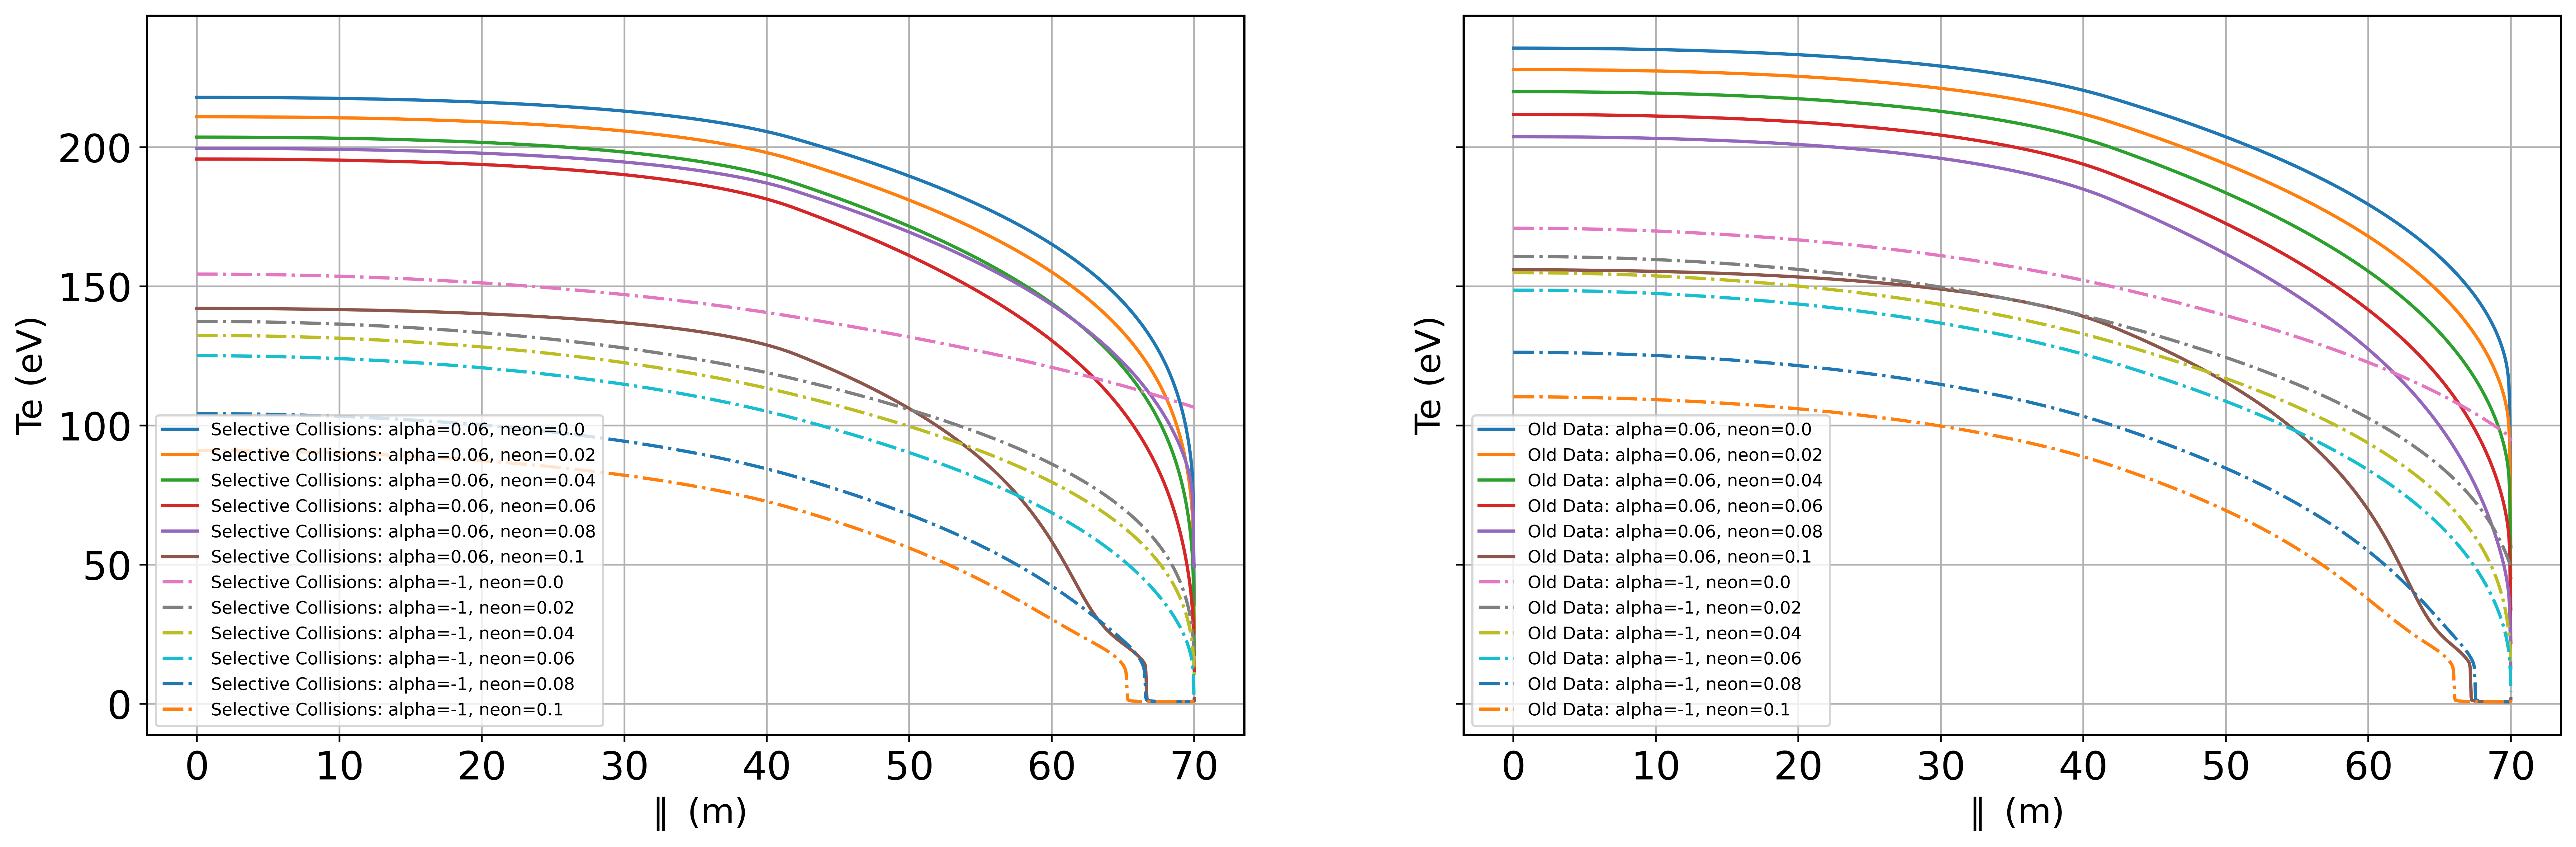

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), dpi=500, sharey=True)

neon_vals = ['0.0', '0.02', '0.04', '0.06', '0.08', '0.1']

plot_temperature_profiles(selective_006, data_label='Selective Collisions', ax=ax[0], neon_values=neon_vals)
plot_temperature_profiles(selective_sh, data_label='Selective Collisions', ax=ax[0], linestyle='-.', neon_values=neon_vals)
# plot_temperature_profiles(selective_snb, data_label='Selective Collisions', ax=ax[0], linestyle=':', neon_values=['0.0', '0.02'])

plot_temperature_profiles(old_006, data_label='Old Data', ax=ax[1], linestyle='-', neon_values=neon_vals)
plot_temperature_profiles(old_sh, data_label='Old Data', ax=ax[1], linestyle='-.', neon_values=neon_vals)
# plot_temperature_profiles(old_snb, data_label='Old Data', ax=ax[1], linestyle=':', neon_values=['0.0', '0.02'])

# ax[0].set_xbound(65, 70.1)
# ax[1].set_xbound(65, 70.1)




<Axes: xlabel='$\\parallel$ (m)', ylabel='Te (eV)'>

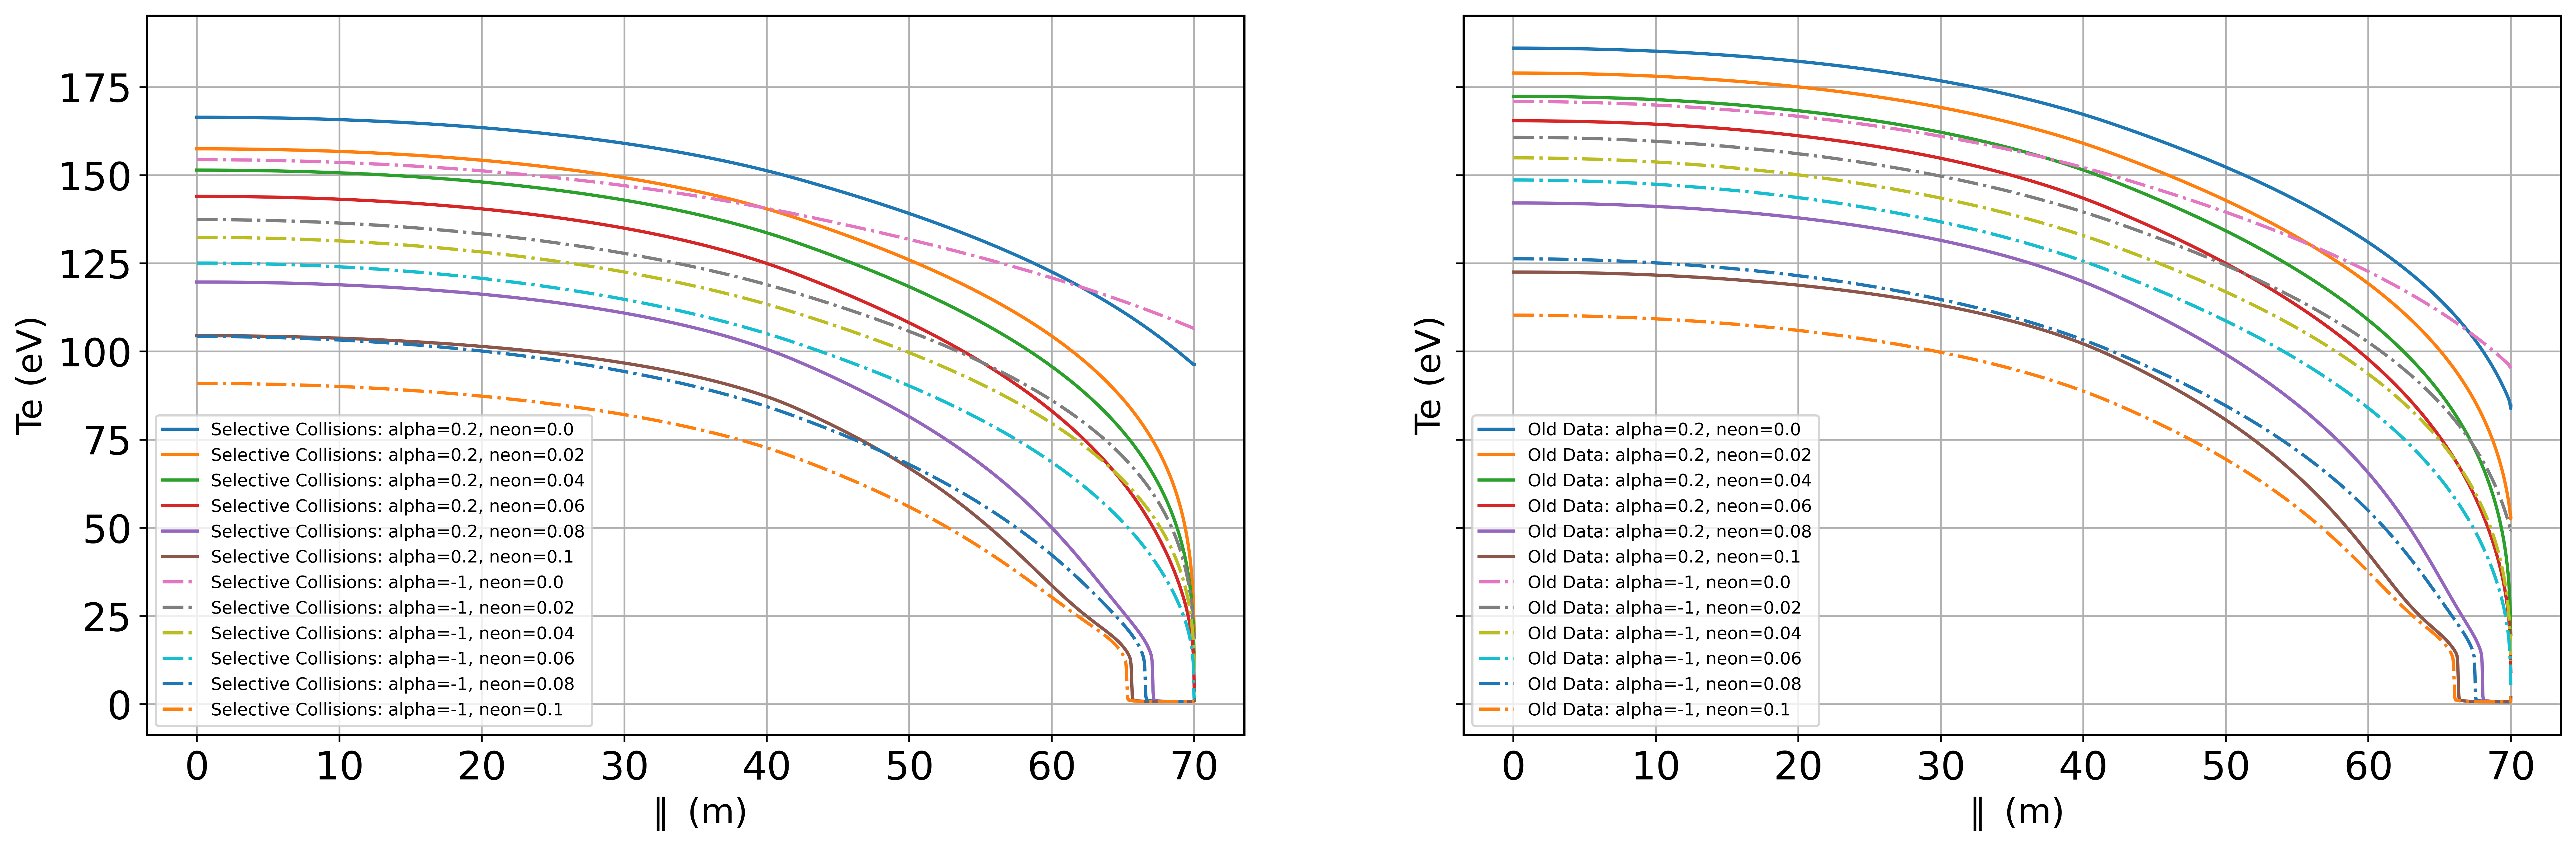

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), dpi=500, sharey=True)

neon_vals = ['0.0', '0.02', '0.04', '0.06', '0.08', '0.1']

plot_temperature_profiles(selective_02, data_label='Selective Collisions', ax=ax[0], neon_values=neon_vals)
plot_temperature_profiles(selective_sh, data_label='Selective Collisions', ax=ax[0], linestyle='-.', neon_values=neon_vals)
# plot_temperature_profiles(selective_snb, data_label='Selective Collisions', ax=ax[0], linestyle=':', neon_values=['0.0', '0.02'])

plot_temperature_profiles(old_02, data_label='Old Data', ax=ax[1], linestyle='-', neon_values=neon_vals)
plot_temperature_profiles(old_sh, data_label='Old Data', ax=ax[1], linestyle='-.', neon_values=neon_vals)
# plot_temperature_profiles(old_snb, data_label='Old Data', ax=ax[1], linestyle=':', neon_values=['0.0', '0.02'])

# ax[0].set_xbound(65, 70.1)
# ax[1].set_xbound(65, 70.1)

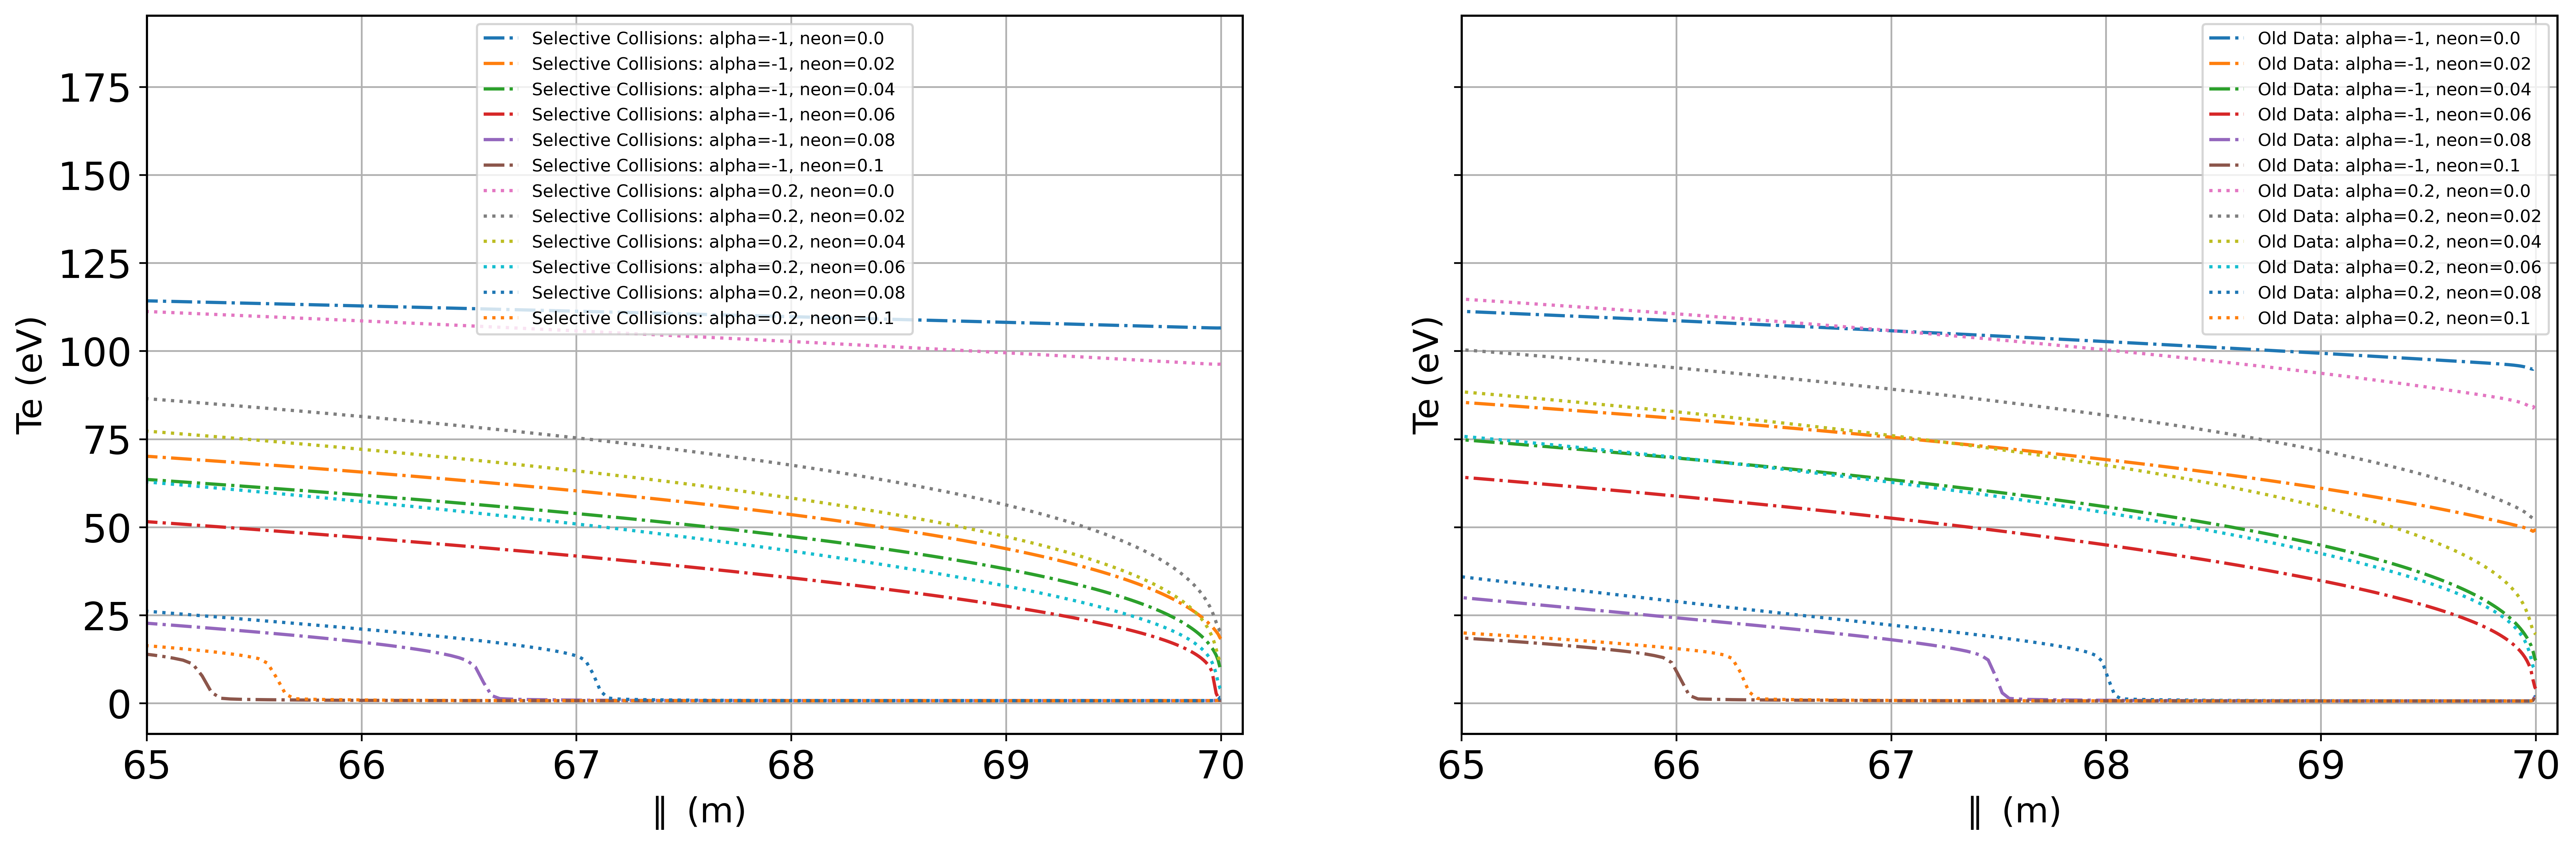

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), dpi=500, sharey=True)

neon_vals = ['0.0', '0.02', '0.04', '0.06', '0.08', '0.1']

# plot_temperature_profiles(selective_006, data_label='Selective Collisions', ax=ax[0], neon_values=neon_vals)
plot_temperature_profiles(selective_sh, data_label='Selective Collisions', ax=ax[0], linestyle='-.', neon_values=neon_vals)
plot_temperature_profiles(selective_02, data_label='Selective Collisions', ax=ax[0], linestyle=':', neon_values=neon_vals)
# plot_temperature_profiles(selective_snb, data_label='Selective Collisions', ax=ax[0], linestyle=':', neon_values=['0.0', '0.02'])

# plot_temperature_profiles(old_006, data_label='Old Data', ax=ax[1], linestyle='-', neon_values=neon_vals)
plot_temperature_profiles(old_sh, data_label='Old Data', ax=ax[1], linestyle='-.', neon_values=neon_vals)
plot_temperature_profiles(old_02, data_label='Old Data', ax=ax[1], linestyle=':', neon_values=neon_vals)
# plot_temperature_profiles(old_snb, data_label='Old Data', ax=ax[1], linestyle=':', neon_values=['0.0', '0.02'])

ax[0].set_xbound(65, 70.1)
ax[1].set_xbound(65, 70.1)

In [5]:
sim_dir = "/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-08-11_selective_collisions_old_collision_setup/last_time_slice"
neon_values = ['0.0', '0.02', '0.04', '0.06', '0.08', '0.1']
alpha_values = ['-1','0.2','0.06','snb']
1
# Load the data
selective_snb = load_simulation_data(sim_dir, alpha_values, neon_values)

loading data for alpha=-1, neon=0.0
Failed to load data for alpha=-1, neon=0.0: No datafiles found matching datapath=/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-08-11_selective_collisions_old_collision_setup/last_time_slice/alpha_-1/neon_0.0/BOUT.dmp.*.nc
loading data for alpha=-1, neon=0.02
Failed to load data for alpha=-1, neon=0.02: No datafiles found matching datapath=/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-08-11_selective_collisions_old_collision_setup/last_time_slice/alpha_-1/neon_0.02/BOUT.dmp.*.nc
loading data for alpha=-1, neon=0.04
Failed to load data for alpha=-1, neon=0.04: No datafiles found matching datapath=/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/updated_flux_limitation/2024-08-11_selective_collisions_old_collision_setup/last_time_slice/alpha_-1/neon_0.04/BOUT.dmp.*.nc
loading data for alpha=-1, neon=0.06
Failed to load data for alp

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def plot_target_temperatures(simulation_data, data_label=None, 
                             guard_replace=True, ax=None, alpha_values=None):
    """
    Plots the final (target) temperature against the neon fraction for the 
    given simulation data, with colours based on the alpha value.

    Parameters:
    simulation_data (dict): Dictionary containing datasets to plot.
    data_label (str, optional): Name of the simulation data to be used in the 
                                label. Defaults to None.
    guard_replace (bool): Whether to replace guard cells in the data.
    ax (matplotlib.axes.Axes): Axis to plot on. If None, a new one is created.
    alpha_values (list, optional): List of alpha values to plot. Defaults to None.

    Returns:
    ax (matplotlib.axes.Axes): The axis with the plotted data.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=500)

    # Colour mapping for alpha values
    colors = {
        '-1': '#E24A33',
        '0.2': '#348ABD',
        '0.1': '#988ED5',
        '0.06': 'grey',
        '0.3': '#777777',
        '0.4': '#FBC15E',
        'snb': 'magenta'
    }

    neon_fractions = []
    final_temperatures = []
    plot_color = None  # To store the current plot color

    for (alpha, neon), ds in simulation_data.items():
        if alpha_values is not None and alpha not in alpha_values:
            continue  # Skip this dataset if it's not in the specified values
           
        try:
            Te = ds['Te'].values
            if guard_replace:
                Te = replace_guards(Te)

            # Get the final temperature (last value of Te)
            final_temperature = Te[-1]

            # Store the neon fraction and final temperature
            neon_fractions.append(neon)
            final_temperatures.append(final_temperature)

            # Set the color based on the alpha value
            plot_color = colors.get(str(alpha), 'black')  # Default to black if alpha not in dict
        
        except KeyError:
            print(f"Te not found in dataset for alpha={alpha}, neon={neon}")
            continue

    # Plot the final temperature against neon fractions
    label = f'{data_label}: alpha={alpha}' if data_label else f'alpha={alpha}'

    ax.plot(neon_fractions, final_temperatures, 'x-', linestyle='-', 
            color=plot_color, label=label)

    ax.set_xlabel('Neon Fraction')
    ax.set_ylabel('Target temperature (eV)')
    ax.grid(True)
    ax.legend(loc='best', fontsize=8)

    return ax



/tmp/ipykernel_3915758/4089148147.py:65: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(neon_fractions, final_temperatures, 'x-', linestyle='-',


<Axes: xlabel='Neon Fraction', ylabel='Target temperature (eV)'>

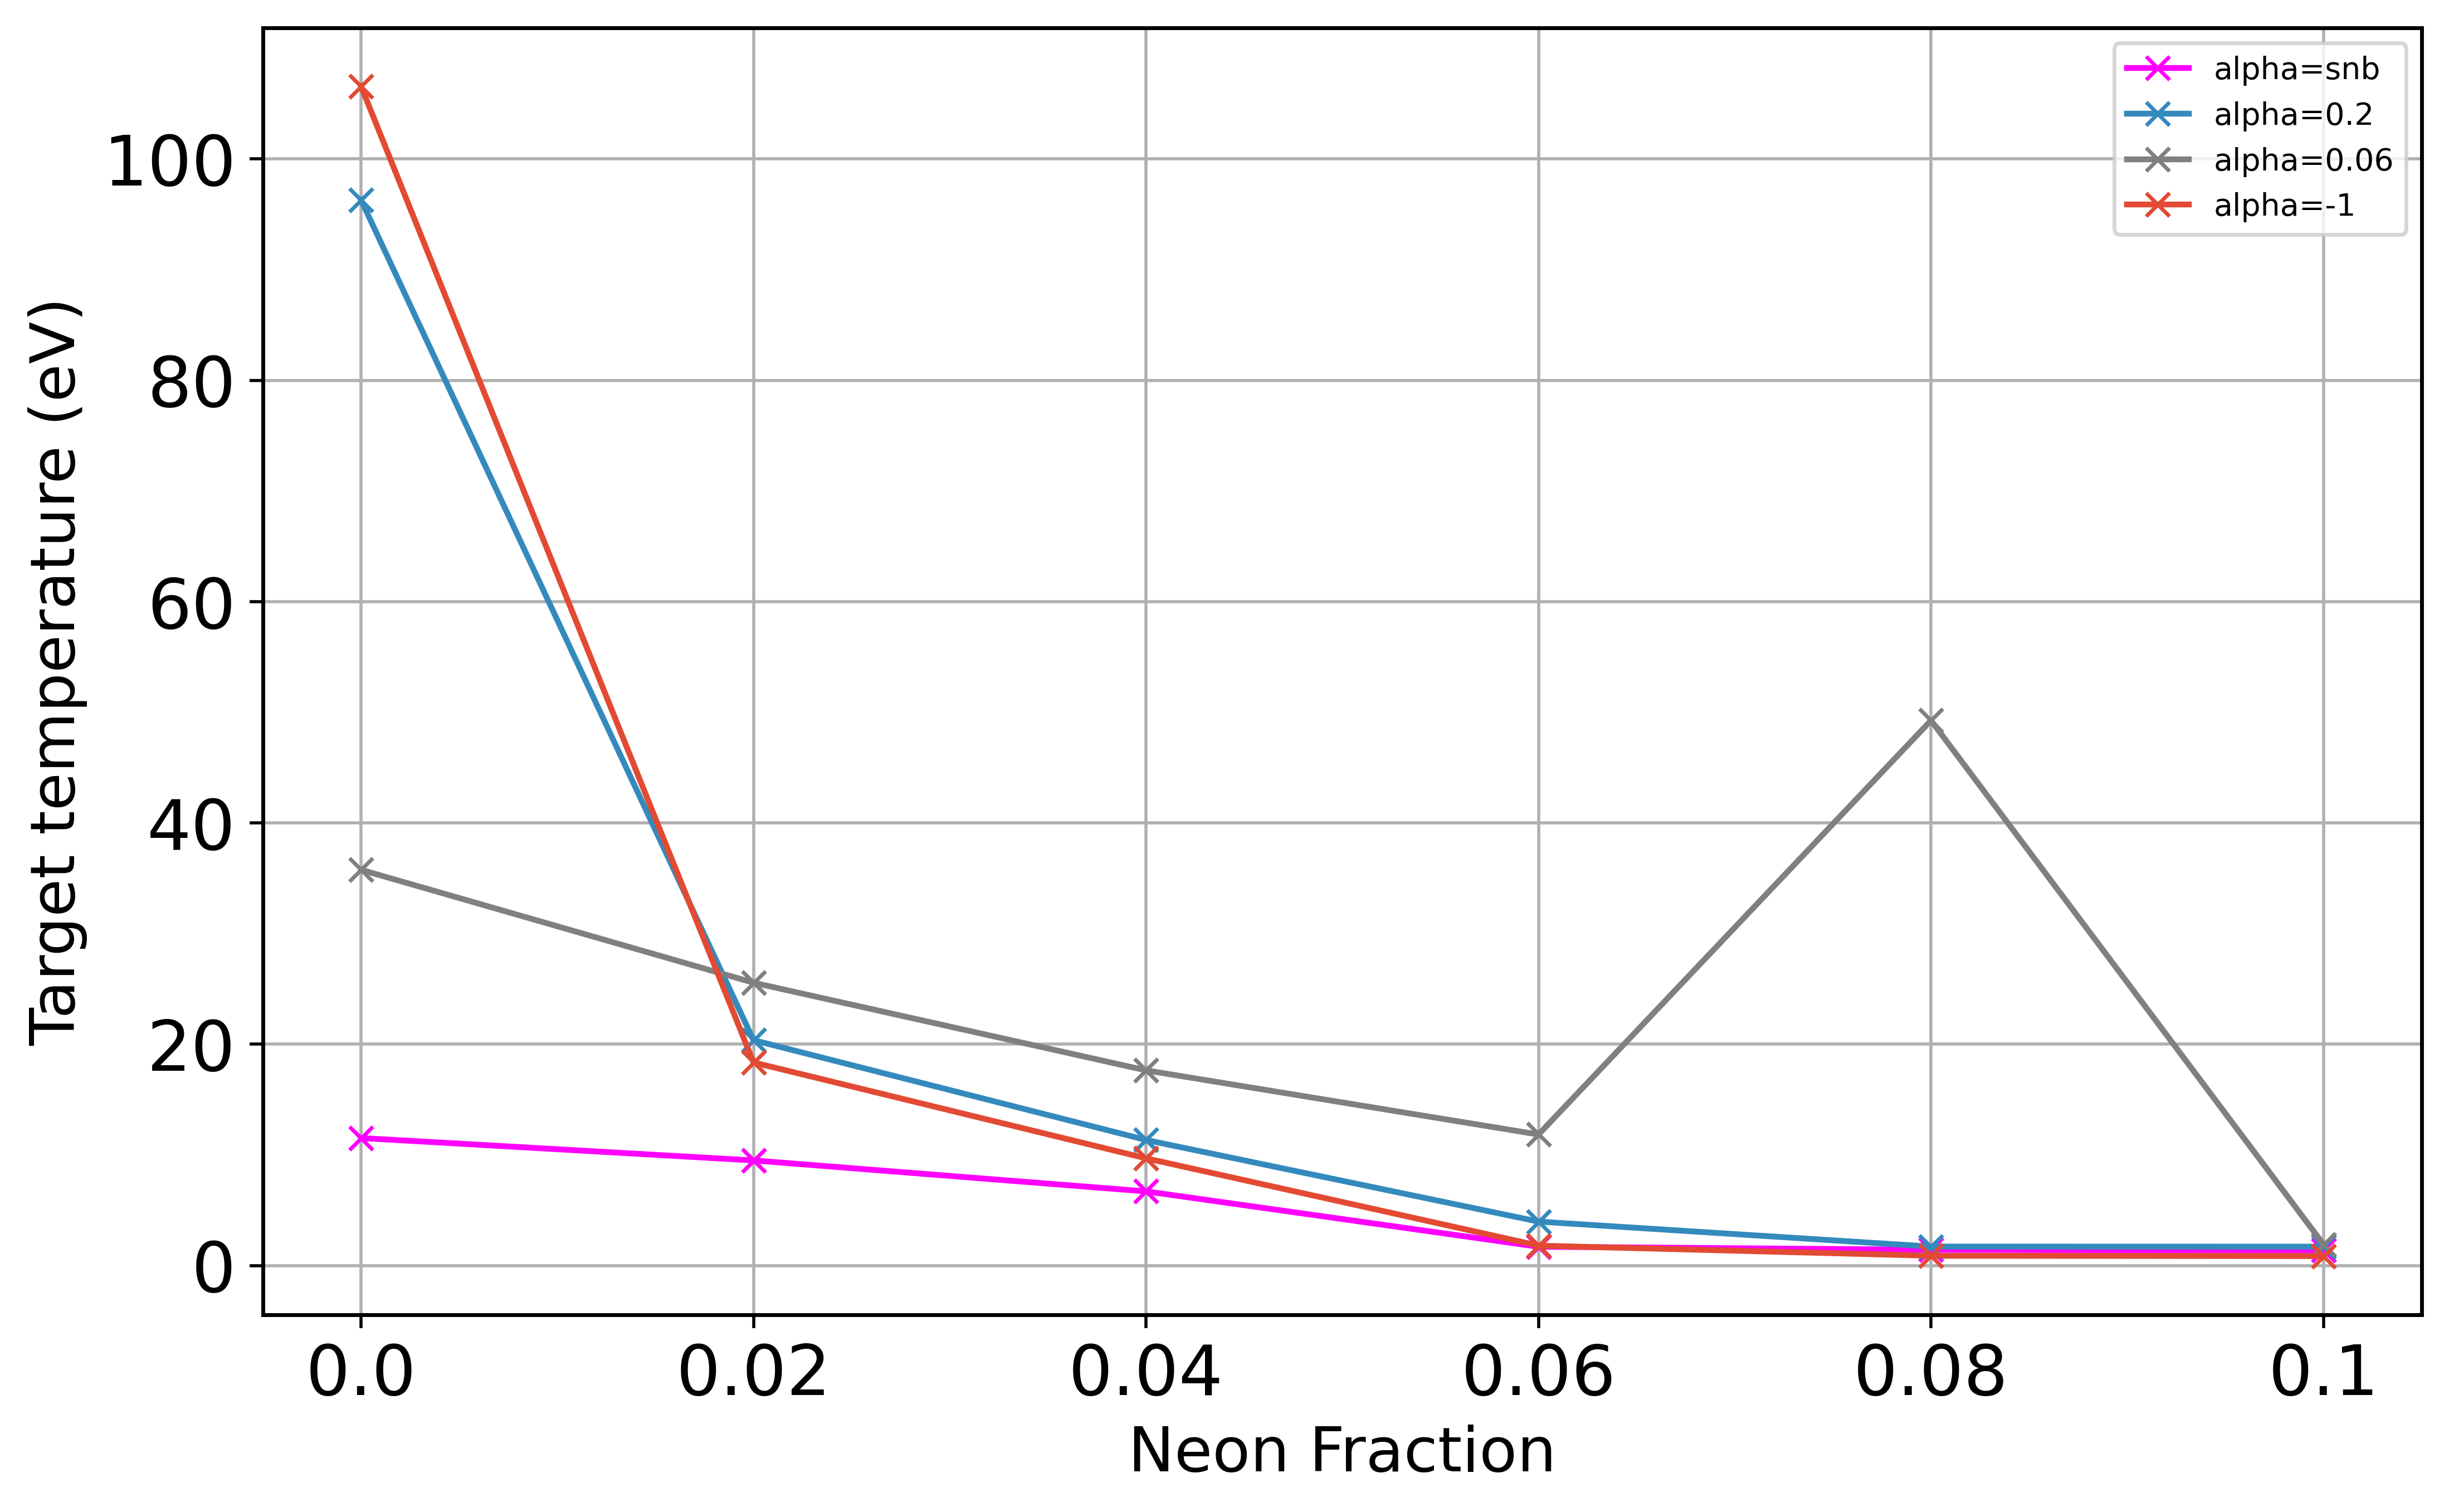

In [41]:
fig,ax = plt.subplots(1,1,figsize=(10,6),dpi=500)

plot_target_temperatures(selective_snb, guard_replace=True, ax=ax)
plot_target_temperatures(selective_02, guard_replace=True, ax=ax)
plot_target_temperatures(selective_006, guard_replace=True, ax=ax)
plot_target_temperatures(selective_sh, guard_replace=True, ax=ax)
# ax.set_ybound(0,20)
# print(selective_006.keys())